# NLP (Natural Language Processing)
# Text Classifiction Problem. 
it has this following process: 

## 1- Tokenization:
    1-1- tokenizing the stirng, 
    1-2- lower casing 
    3- removing stop words and punctuations 
## 2-Normalization 
    2-1- Stemming
    2-2- Lemmatizing 
## 3- Creating Numerical data from text 
    3-1- Bag of Words 
    3-2- TFIDF 
## 4- Classify with 
    PolynomialNB,
    Logistic regressio
    Decision Tree
    Support Vector Machine 
## 5- Evaluation 
## 6- Usign gridsearch to tune the hyperparamters 
## 7- Evaluation and Chosing the best model 
## 8- Feature selection and permutation 
## 9- Discusin and suggestions 

# In this project I analyze data of Twitter and WhatAPP. 

In [ ]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.inspection import permutation_importance
from sklearn.base import TransformerMixin, BaseEstimator

import time


## <span style="color: red; ">  **Importing   NLTK and download the data**  </span>  

In [ ]:
import nltk
nltk.download('twitter_samples')

## <span style="color: red; ">  **Loading Twitter data**  </span>   

In [ ]:
from nltk.corpus import twitter_samples
tweets_positive = twitter_samples.strings('positive_tweets.json')     #  5000 data 
tweets_negative  = twitter_samples.strings('negative_tweets.json')     #  5000 data 
tweets_all = tweets_positive + tweets_negative                             # 10000 data 

In [ ]:
labels_pos = np.ones ((len(tweets_positive),1), dtype=np.int8)  # positive labels (1)
labels_neg = np.zeros((len(tweets_negative),1), dtype=np.int8)  # negative labels (0)
labels_all = np.append(labels_pos,labels_neg)              # all labels

In [ ]:
# creating dataframe
pd.DataFrame(data={'tweet':tweets_all,'label':labels_all})

## <span style="color: red; ">  **Data split into train and test**  </span>   

In [45]:

X_train, X_test, y_train, y_test = train_test_split(tweets_all, labels_all,
                                                    test_size=0.25, 
                                                    random_state=34)

len(X_train), len(X_test), len(y_train), len(y_test)

(7500, 2500, 7500, 2500)

## <span style="color: red; ">  **Preprocessing of data and Normalization**  </span>   

### <span style="color: red; ">  **Tokenize**  </span>   

In [46]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
X_train_tok = [tokenizer.tokenize(tweet) for tweet in X_train]

In [47]:
n = 80
X_train[n],X_train_tok[n]

('Looking for fun? SNAPCHAT - luceleva21 #snapchat #kikgirl #porno #nudes #omegle #countrymusic #sexysasunday :( http://t.co/T8pqZuLaEx',
 ['looking',
  'for',
  'fun',
  '?',
  'snapchat',
  '-',
  'luceleva',
  '21',
  '#snapchat',
  '#kikgirl',
  '#porno',
  '#nudes',
  '#omegle',
  '#countrymusic',
  '#sexysasunday',
  ':(',
  'http://t.co/T8pqZuLaEx'])

In [48]:
X_train[50]

"Omg happy late birthday @mariahjoyyy I'm so sorry I missed it :( love you though hope you had a lot of fun 😘🎉"

In [49]:
X_train_tok[50]

['omg',
 'happy',
 'late',
 'birthday',
 "i'm",
 'so',
 'sorry',
 'i',
 'missed',
 'it',
 ':(',
 'love',
 'you',
 'though',
 'hope',
 'you',
 'had',
 'a',
 'lot',
 'of',
 'fun',
 '😘',
 '🎉']

### <span style="color: red; ">  **Removing Stopwords**  </span>   

In [50]:
swords = stopwords.words('english')
X_train_tok_nostop = []
for tweet in X_train_tok:
    words = [word for word in tweet if word not in swords]
    X_train_tok_nostop.append(words)

In [51]:
X_train_tok_nostop[100]

['miss', 'guppy', '.', ':-(']

### <span style="color: red; ">  **Stemming**  </span>   

In [52]:
stemmer = PorterStemmer()
X_train_tok_nostop_stem = []
for tweet in X_train_tok_nostop:
    words = [stemmer.stem(word) for word in tweet]
    X_train_tok_nostop_stem.append(words)

In [53]:
X_train_tok_nostop_stem[89]

['your', 'get', 'famou', ':(']

### <span style="color: red; ">  **Defining a function to apply all**  </span>   

In [54]:
def preprocess_text(tweets):

    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    stemmer = PorterStemmer()
    swords = stopwords.words('english')

    X = []
    for tweet in tweets:
        tokens = tokenizer.tokenize(tweet)
        X.append([stemmer.stem(word) for word in tokens if word not in swords]) 
        
    return X

In [55]:
X_train_pp = preprocess_text(X_train)

### <span style="color: red; ">  **Word- Frequencies**  </span>   

In [56]:
unique_words = set()
for tweet in X_train_pp:
    unique_words.update(tweet)
len(unique_words)

10257

In [57]:
words_postive = []
words_negative = []

for tweet, label in zip(X_train_pp,y_train):
    if label==0:
        words_negative.extend(tweet)
    else:
        words_postive.extend(tweet)
        
unique_words = np.array(list(unique_words))
words_postive = np.array(words_postive)
words_negative = np.array(words_negative)

print(words_postive[:10])
print(words_negative[:10])

['enjoy' '!' 'sorri' 'hastili' 'type' 'messag' '!' ':)' 'surpris' 'visit']
['download' '?' ':(' ':(' ':(' 'know' 'goe' ',' 'still' '...']


In [58]:
len(words_postive) + len(words_negative)

61538

In [59]:
word_count = { w: [0,0] for w in unique_words }
for word in words_postive:
    word_count[word][1] += 1
for word in words_negative:
    word_count[word][0] += 1

In [60]:
word_count_matrix = np.array([val for key,val in word_count.items()])

ind_neg = np.argsort(word_count_matrix[:,0])
ind_pos = np.argsort(word_count_matrix[:,1])

print(unique_words[ind_neg[-4:]])
print(unique_words[ind_pos[-4:]])

word_count[':(']

['!' '.' '(' ':(']
[',' '.' '!' ':)']


[3447, 1]

In [61]:
word_count['.']

[817, 990]

# <span style="color: red; ">  **Ploting a sample of keys**  </span>  

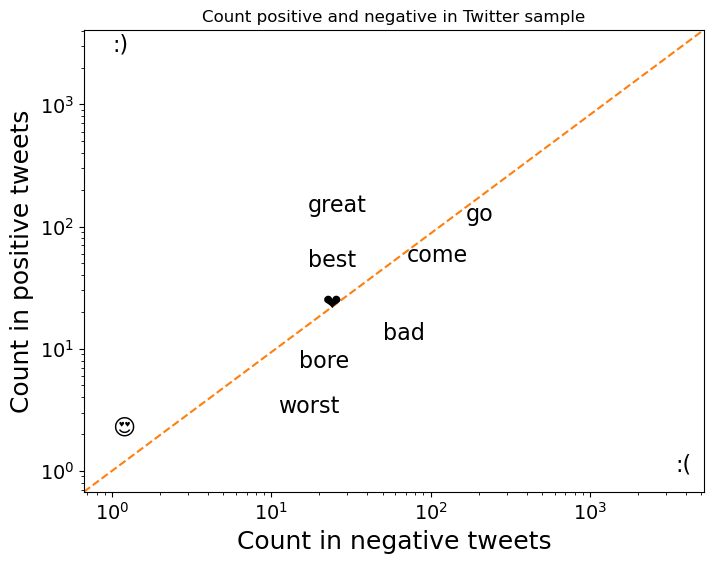

In [62]:
keys = [':)', ':(', '❤', '😍', '😒', 'great','come','go', 'bad','bore','best','worst',]\

A = np.array([word_count[key] for key in keys])

plt.figure(figsize=(8,6))
plt.loglog(A[:,0],A[:,1],'.',markersize=0)  
xlim = plt.xlim()
ylim = plt.ylim()
plt.loglog(xlim,ylim,'--')
plt.xlim(xlim)
plt.ylim(ylim)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel("Count in positive tweets", fontsize=18)
plt.xlabel("Count in negative tweets", fontsize=18)
plt.title("Count positive and negative in Twitter sample")

for i in range(0, len(keys)):
    plt.annotate(keys[i], A[i,:], fontsize=16)

# 
# <span style="color: red; ">  **Normailzation with Full bag of words approach**  </span> 

In [63]:
bow_matrix_train = np.zeros((len(X_train_pp),len(unique_words)))
for i, tweet in enumerate(X_train_pp):
    for word in tweet:
        bow_matrix_train[i,unique_words==word] += 1

In [64]:
np.sum(bow_matrix_train!=0)/np.prod(bow_matrix_train.shape)

0.0007429592798414091

In [65]:
df = pd.DataFrame(data=bow_matrix_train,columns=unique_words)
df

,http://t.co/mphby49eei,juan,lana,http://t.co/vqvmrn3br1,abp,megafauna,caramoan,cope,#hashtag,grandma,...,#frnd,steve,rehears,marino,everytim,silicon,esp,thrice,#familyhom,gelen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# <span style="color: red; ">  **Creating test data and label it**  </span> 


In [66]:
X_test_pp = preprocess_text(X_test)
bow_matrix_test = np.zeros((len(X_test_pp),len(unique_words)))
for i, tweet in enumerate(X_test_pp):
    for word in tweet:
        if word in unique_words:
            bow_matrix_test[i,unique_words==word] += 1

# <span style="color: red; ">  **Using Naive Bayes as classification**  </span> 

In [30]:
alpha = 1 # smooting fact
M = bow_matrix_train.shape[1]

# indices of positive tweets
ind_pos = y_train==1

# Word count for each term i in positive and negative tweets
N_pos_i = bow_matrix_train[ ind_pos,:].sum(axis=0)
N_neg_i = bow_matrix_train[~ind_pos,:].sum(axis=0)

# Total word count in positive and negative tweets
N_pos = N_pos_i.sum()
N_neg = N_neg_i.sum()

# Coefficients for positive and negative classes
logp_pos_i = np.log( (N_pos_i+alpha)/(N_pos+M*alpha) )
logp_neg_i = np.log( (N_neg_i+alpha)/(N_neg+M*alpha) )

# Intercepts for positive and negative classes
logp_pos = np.log( N_pos/(N_pos + N_neg) )
logp_neg = np.log( N_neg/(N_pos + N_neg) )

print(logp_pos_i)

[-10.63974211 -10.63974211  -9.94659493 ...  -9.54112983  -9.54112983
  -9.54112983]


In [31]:
naive_bayes = MultinomialNB(alpha=1.0, fit_prior=False).fit(bow_matrix_train,y_train)

In [32]:
print(naive_bayes.feature_log_prob_[1])

[-10.63974211 -10.63974211  -9.94659493 ...  -9.54112983  -9.54112983
  -9.54112983]


In [33]:
naive_bayes.score(bow_matrix_test, y_test)

0.9948

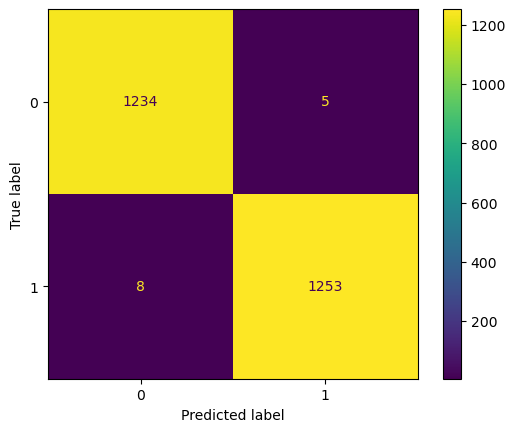

In [34]:
ConfusionMatrixDisplay.from_estimator(naive_bayes, bow_matrix_test, y_test)

# <span style="color: red; ">  **Using Logistic regression as classification**  </span> 

In [35]:
lr_full = LogisticRegression().fit(bow_matrix_train,y_train)

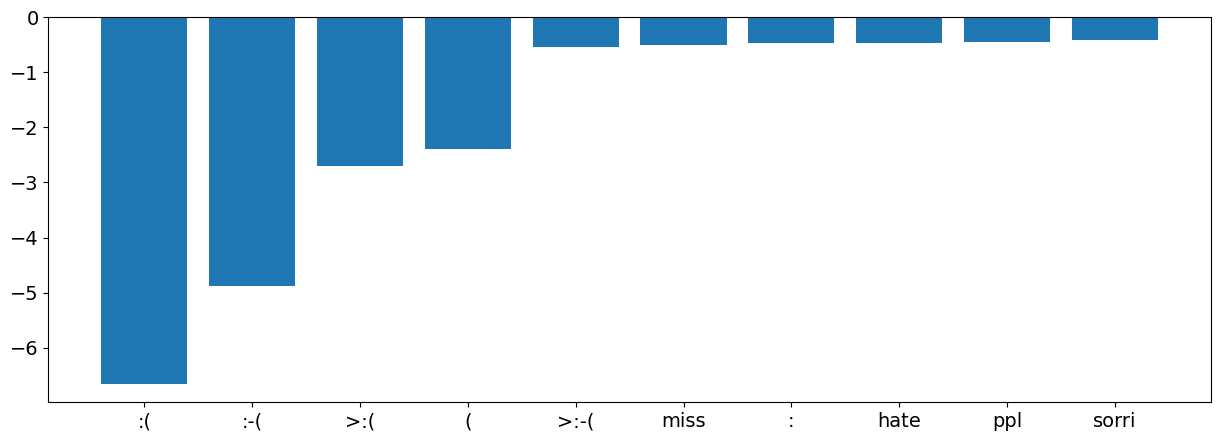

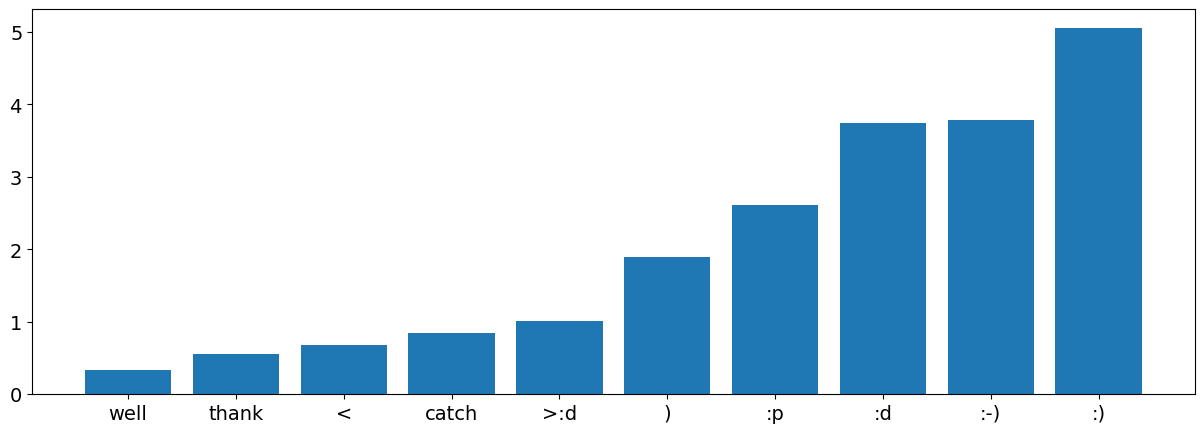

In [36]:
ind = np.argsort(lr_full.coef_[0])

n = 
plt.figure(figsize=(15,5))
plt.bar([unique_words[i] for i in ind[:n]], lr_full.coef_[0,ind[:n]])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.figure(figsize=(15,5))
plt.bar([unique_words[i] for i in ind[-n:]], lr_full.coef_[0,ind[-n:]])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [37]:
lr_full.score(bow_matrix_test, y_test)

0.9988

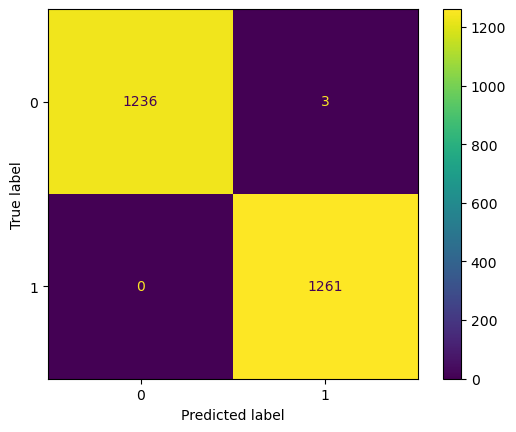

In [38]:
ConfusionMatrixDisplay.from_estimator(lr_full, bow_matrix_test, y_test)

# <span style="color: red; ">  **Using Support Vector Machine as classification**  </span> 

In [67]:
#fit the model 
svc_full = SVC().fit(bow_matrix_train,y_train)

In [68]:
#check the socre of the model 
svc_full.score(bow_matrix_test, y_test)

0.9976

In [ ]:

result = permutation_importance(svc_full, bow_matrix_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
resutls 

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_full, bow_matrix_test, y_test)

In [ ]:
# <span style="color: red; ">  **Using Decision Trees as classification**  </span> 

In [50]:
dt_full = DecisionTreeClassifier().fit(bow_matrix_train,y_train)


In [51]:
dt_full.score(bow_matrix_test, y_test)


0.9464

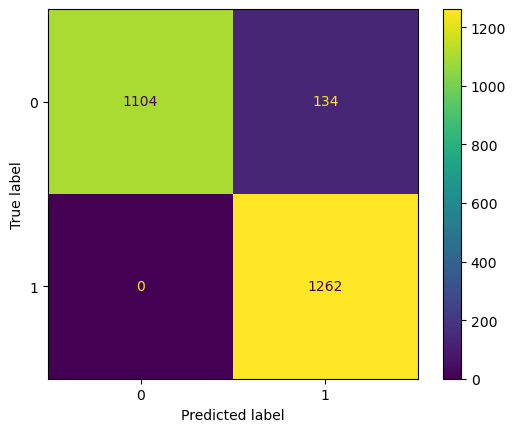

In [52]:
ConfusionMatrixDisplay.from_estimator(dt_full, bow_matrix_test, y_test)

In [56]:
knn_full = NearestNeighbors().fit(bow_matrix_train,y_train)

In [57]:
knn_full.score(bow_matrix_test, y_test)

AttributeError: 'NearestNeighbors' object has no attribute 'score'

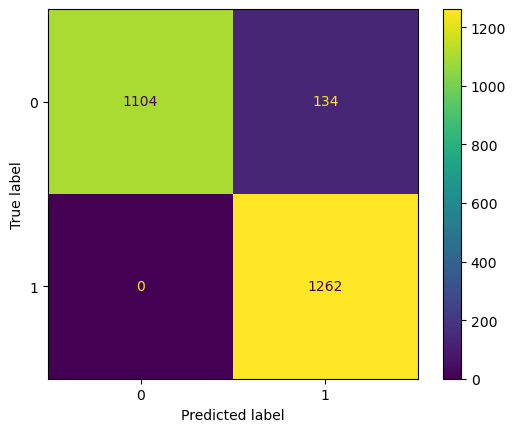

In [58]:
ConfusionMatrixDisplay.from_estimator(dt_full, bow_matrix_test, y_test)

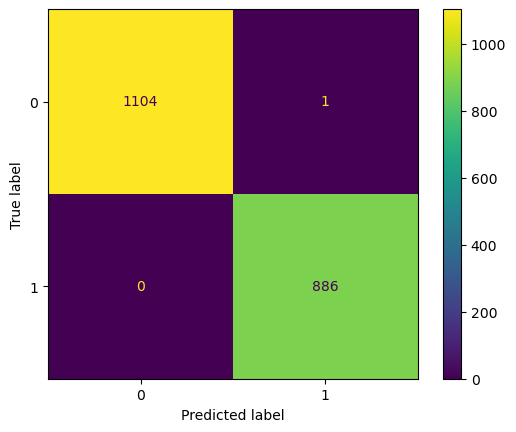

In [43]:
ConfusionMatrixDisplay.from_estimator(lr_red, bow_matrix_test_red, y_test_red)

# <span style="color: red; ">  **Named Entities in NLP**  </span> 

In [2]:
# Creating text  
text  = '''
Since the ancients (as we are told by Pappus), made great account of the science of mechanics in the investigation of natural things; and the moderns, laying aside substantial forms and occult qualities, have endeavoured to subject the phænomena of nature to the laws of mathematics, I have in this treatise cultivated mathematics so far as it regards philosophy. The ancients considered mechanics in a twofold respect; as rational, which proceeds accurately by demonstration: and practical. To practical mechanics all the manual arts belong, from which mechanics took its name. But as artificers do not work with perfect accuracy, it comes to pass that mechanics is so distinguished from geometry, that what is perfectly accurate is called geometrical, what is less so, is called mechanical. But the errors are not in the art, but in the artificers. He that works with less accuracy is an imperfect mechanic; and if any could work with perfect accuracy, he would be the most perfect mechanic of all; for the description if right lines and circles, upon which geometry is founded, belongs to mechanics. Geometry does not teach us to draw these lines, but requires them to be drawn; for it requires that the learner should first be taught to describe these accurately, before he enters upon geometry; then it shows how by these operations problems may be solved. To describe right lines and circles are problems, but not geometrical problems. The solution of these problems is required from mechanics; and by geometry the use of them, when so solved, is shown; and it is the glory of geometry that from those few principles, brought from without, it is able to produce so many things. Therefore geometry is founded in mechanical practice, and is nothing but that part of universal mechanics which accurately proposes and demonstrates the art of measuring. But since the manual arts are chiefly conversant in the moving of bodies, it comes to pass that geometry is commonly referred to their magnitudes, and mechanics to their motion. In this sense rational mechanics will be the science of motions resulting from any forces whatsoever, and of the forces required to produce any motions, accurately proposed and demonstrated. This part of mechanics was cultivated by the ancients in the five powers which relate to manual arts, who considered gravity (it not being a manual power), no otherwise than as it moved weights by those powers. Our design not respecting arts, but philosophy, and our subject not manual but natural powers, we consider chiefly those things which relate to gravity, levity, elastic force, the resistance of fluids, and the like forces, whether attractive or impulsive; and therefore we offer this work as the mathematical principles if philosophy; for all the difficulty of philosophy seems to consist in this—from the phænomena of motions to investigate the forces of nature, and then from these forces to demonstrate the other phænomena; and to this end the general propositions in the first and second book are directed. In the third book we give an example of this in the explication of the System of the World; for by the propositions mathematically demonstrated in the former books, we in the third derive from the celestial phenomena the forces of gravity with which bodies tend to the sun and the several planets. Then from these forces, by other propositions which are also mathematical, we deduce the motions of the planets, the comets, the moon, and the sea. I wish we could derive the rest of the phænomena of nature by the same kind of reasoning from mechanical principles; for I am induced by many reasons to suspect that they may all depend upon certain forces by which the particles of bodies, by some causes hitherto unknown, are either mutually impelled towards each other, and cohere in regular figures, or are repelled and recede from each other; which forces being unknown, philosophers have hitherto attempted the search of nature in vain; but I hope the principles here laid down will afford some light either to this or some truer method of philosophy.'''

In [3]:
text

'\nSince the ancients (as we are told by Pappus), made great account of the science of mechanics in the investigation of natural things; and the moderns, laying aside substantial forms and occult qualities, have endeavoured to subject the phænomena of nature to the laws of mathematics, I have in this treatise cultivated mathematics so far as it regards philosophy. The ancients considered mechanics in a twofold respect; as rational, which proceeds accurately by demonstration: and practical. To practical mechanics all the manual arts belong, from which mechanics took its name. But as artificers do not work with perfect accuracy, it comes to pass that mechanics is so distinguished from geometry, that what is perfectly accurate is called geometrical, what is less so, is called mechanical. But the errors are not in the art, but in the artificers. He that works with less accuracy is an imperfect mechanic; and if any could work with perfect accuracy, he would be the most perfect mechanic of a

####  
### <span style="color: red; ">  **Tokenizing a String in word**  </span> 

In [4]:
word_tkn= word_tokenize(text)

In [5]:
word_tkn

['Since',
 'the',
 'ancients',
 '(',
 'as',
 'we',
 'are',
 'told',
 'by',
 'Pappus',
 ')',
 ',',
 'made',
 'great',
 'account',
 'of',
 'the',
 'science',
 'of',
 'mechanics',
 'in',
 'the',
 'investigation',
 'of',
 'natural',
 'things',
 ';',
 'and',
 'the',
 'moderns',
 ',',
 'laying',
 'aside',
 'substantial',
 'forms',
 'and',
 'occult',
 'qualities',
 ',',
 'have',
 'endeavoured',
 'to',
 'subject',
 'the',
 'phænomena',
 'of',
 'nature',
 'to',
 'the',
 'laws',
 'of',
 'mathematics',
 ',',
 'I',
 'have',
 'in',
 'this',
 'treatise',
 'cultivated',
 'mathematics',
 'so',
 'far',
 'as',
 'it',
 'regards',
 'philosophy',
 '.',
 'The',
 'ancients',
 'considered',
 'mechanics',
 'in',
 'a',
 'twofold',
 'respect',
 ';',
 'as',
 'rational',
 ',',
 'which',
 'proceeds',
 'accurately',
 'by',
 'demonstration',
 ':',
 'and',
 'practical',
 '.',
 'To',
 'practical',
 'mechanics',
 'all',
 'the',
 'manual',
 'arts',
 'belong',
 ',',
 'from',
 'which',
 'mechanics',
 'took',
 'its',
 'name

####
### <span style="color: red; ">  **Sentence Tokenization of a string**  </span> 

In [6]:
sent_tkn = sent_tokenize(text)
sent_tkn

['\nSince the ancients (as we are told by Pappus), made great account of the science of mechanics in the investigation of natural things; and the moderns, laying aside substantial forms and occult qualities, have endeavoured to subject the phænomena of nature to the laws of mathematics, I have in this treatise cultivated mathematics so far as it regards philosophy.',
 'The ancients considered mechanics in a twofold respect; as rational, which proceeds accurately by demonstration: and practical.',
 'To practical mechanics all the manual arts belong, from which mechanics took its name.',
 'But as artificers do not work with perfect accuracy, it comes to pass that mechanics is so distinguished from geometry, that what is perfectly accurate is called geometrical, what is less so, is called mechanical.',
 'But the errors are not in the art, but in the artificers.',
 'He that works with less accuracy is an imperfect mechanic; and if any could work with perfect accuracy, he would be the most 

### <span style="color: red; ">  **fiding unique Words with set**  </span> 

In [7]:
set_tkn= set(word_tokenize(text))
set_tkn

{'(',
 ')',
 ',',
 '.',
 ':',
 ';',
 'But',
 'Geometry',
 'He',
 'I',
 'In',
 'Our',
 'Pappus',
 'Since',
 'System',
 'The',
 'Then',
 'Therefore',
 'This',
 'To',
 'World',
 'a',
 'able',
 'account',
 'accuracy',
 'accurate',
 'accurately',
 'afford',
 'all',
 'also',
 'am',
 'an',
 'ancients',
 'and',
 'any',
 'are',
 'art',
 'artificers',
 'arts',
 'as',
 'aside',
 'attempted',
 'attractive',
 'be',
 'before',
 'being',
 'belong',
 'belongs',
 'bodies',
 'book',
 'books',
 'brought',
 'but',
 'by',
 'called',
 'causes',
 'celestial',
 'certain',
 'chiefly',
 'circles',
 'cohere',
 'comes',
 'comets',
 'commonly',
 'consider',
 'considered',
 'consist',
 'conversant',
 'could',
 'cultivated',
 'deduce',
 'demonstrate',
 'demonstrated',
 'demonstrates',
 'demonstration',
 'depend',
 'derive',
 'describe',
 'description',
 'design',
 'difficulty',
 'directed',
 'distinguished',
 'do',
 'does',
 'down',
 'draw',
 'drawn',
 'each',
 'either',
 'elastic',
 'end',
 'endeavoured',
 'enters'

#### Counts of words in the text 

In [ ]:
count_word = len(word_tokenize(text))


### <span style="color: red; ">  **Finding  Lexical Diversity**  </span> 
The lexical diversity of a text is the ratio of unique words to the total words

In [9]:
lex_div= len(set(word_tokenize(text)))/len(word_tokenize(text))
lex_div

0.370757180156658

### <span style="color: red; ">  **Using apply to analyze text in a DataFrame**  </span> 


In [10]:
happy_df = pd.read_csv('data/Emotion(happy).csv')
happy_df.head()

,content,sentiment
0,Wants to know how the hell I can remember word...,happy
1,Love is a long sweet dream & marriage is an al...,happy
2,The world could be amazing when you are slight...,happy
3,My secret talent is getting tired without doin...,happy
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happy


In [12]:
# number of non-unique words 
df_non_unique = len(set(happy_df['content'].apply(word_tokenize).sum()))
df_non_unique

2095

#### Dataset 

In [13]:
happy_df = pd.read_csv('data/Emotion(happy).csv')
sad_df = pd.read_csv('data/Emotion(sad).csv')

In [14]:
df = pd.concat([happy_df, sad_df]).reset_index(drop = True)
df.shape 
df

,content,sentiment
0,Wants to know how the hell I can remember word...,happy
1,Love is a long sweet dream & marriage is an al...,happy
2,The world could be amazing when you are slight...,happy
3,My secret talent is getting tired without doin...,happy
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happy
...,...,...
1338,Stop crying over yesterday and start smiling f...,sad
1339,An Eye with Dust ‘n A Heart with Trust Always ...,sad
1340,Tears come from the heart and not from the brain.,sad
1341,"Sometimes you have to hold your head up high, ...",sad


In [15]:
X = df.drop('sentiment', axis = 1)
y = df['sentiment']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X['content'], y, random_state = 42)

In [17]:
X_train.head()

1287    ['You Hurt Me But I Still Love You.', 'True Lo...
1112    Sorry isn’t always enough. Sometimes you actua...
823     Sometimes two people have to fall apart to rea...
651     True love isn’t love at first sight but love a...
1101    i am scared of getting too close to anyone bec...
Name: content, dtype: object


### <span style="color: red; ">  **Stemming and Lemmatization**  </span> 


### <span style="color: red; ">  **CountVectorizer**  </span> 

In [18]:
cvect = CountVectorizer()
dtm = cvect.fit_transform(X_train)
#control the resuls 
pd.DataFrame(dtm.toarray(), columns = cvect.get_feature_names_out()).head()


,0_0,100,123whatsappstatus,204,30,404,44,45,55,805,...,yes,yesterday,yet,you,young,your,yours,yourself,yous,yuh
0,0,0,0,0,0,0,0,0,0,0,...,2,0,1,112,0,13,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
####  CountVectorizer, also use stop words 

In [20]:
cvect2 = CountVectorizer(stop_words = 'english')
X_train_vect_2 = cvect2.fit_transform(X_train)
X_test_vect_2 = cvect2.transform(X_test)

### <span style="color: red; ">  **TFIDF VECTORIZER**  </span> 

In [27]:

tfidf = TfidfVectorizer()
dtm= tfidf.fit_transform(X_train)

### ANSWER CHECK
pd.DataFrame(dtm.toarray(), columns = tfidf.get_feature_names_out()).head()

,0_0,100,123whatsappstatus,204,30,404,44,45,55,805,...,yes,yesterday,yet,you,young,your,yours,yourself,yous,yuh
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01397,0.0,0.006924,0.398355,0.0,0.070646,0.0,0.01305,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.184358,0.0,0.000000,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0


### <span style="color: red; ">  **Pipeline with TfidfVectorizer**  </span> 

In [28]:
tfidf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                       ('lgr', LogisticRegression())])
tfidf_pipe.fit(X_train, y_train)
test_acc = tfidf_pipe.score(X_test, y_test)

#control 
tfidf_pipe.named_steps

{'tfidf': TfidfVectorizer(), 'lgr': LogisticRegression()}

### <span style="color: red; ">  **Pipeline and Grid Search - tfidf**  </span> 

In [29]:
params = {'tfidf__max_features': [100, 500, 1000, 2000],
         'tfidf__stop_words': ['english', None]}

In [30]:
# grid search for TFIDF 
grid = GridSearchCV(tfidf_pipe, param_grid=params)
grid.fit(X_train, y_train)
test_acc = grid.score(X_test, y_test)


#control 
grid.best_params_

{'tfidf__max_features': 500, 'tfidf__stop_words': None}

### <span style="color: red; ">  **Pipeline and Grid Search - bag of words**  </span> 

In [34]:
vect_pipe_1 = Pipeline([('cvect', CountVectorizer()),
                       ('lgr', LogisticRegression())])
vect_pipe_1.fit(X_train, y_train)
test_acc = vect_pipe_1.score(X_test, y_test)
### END SOLUTION


### ANSWER CHECK
vect_pipe_1.named_steps

{'cvect': CountVectorizer(), 'lgr': LogisticRegression()}

In [35]:
params = {'cvect__max_features': [100, 500, 1000, 2000],
         'cvect__stop_words': ['english', None]}

In [36]:
# gridsearch for bag of words
grid = GridSearchCV(vect_pipe_1, param_grid=params)
grid.fit(X_train, y_train)
test_acc = grid.score(X_test, y_test)
### END SOLUTION

### ANSWER CHECK
grid.best_params_

{'cvect__max_features': 2000, 'cvect__stop_words': None}